<a href="https://colab.research.google.com/github/sherlinvarshitha/STML/blob/main/sherlin_2303A52266_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Health Insurance

KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['smoker'])
y = data['smoker']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as an example
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9477611940298507

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       214
           1       0.86      0.89      0.87        54

    accuracy                           0.95       268
   macro avg       0.91      0.93      0.92       268
weighted avg       0.95      0.95      0.95       268



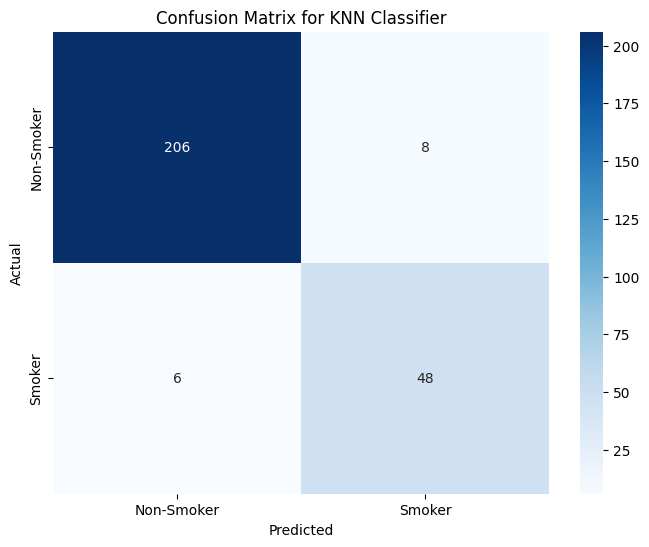

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


Decision Tree


Decision Tree Accuracy: 0.9589552238805971

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       214
           1       0.86      0.94      0.90        54

    accuracy                           0.96       268
   macro avg       0.93      0.95      0.94       268
weighted avg       0.96      0.96      0.96       268



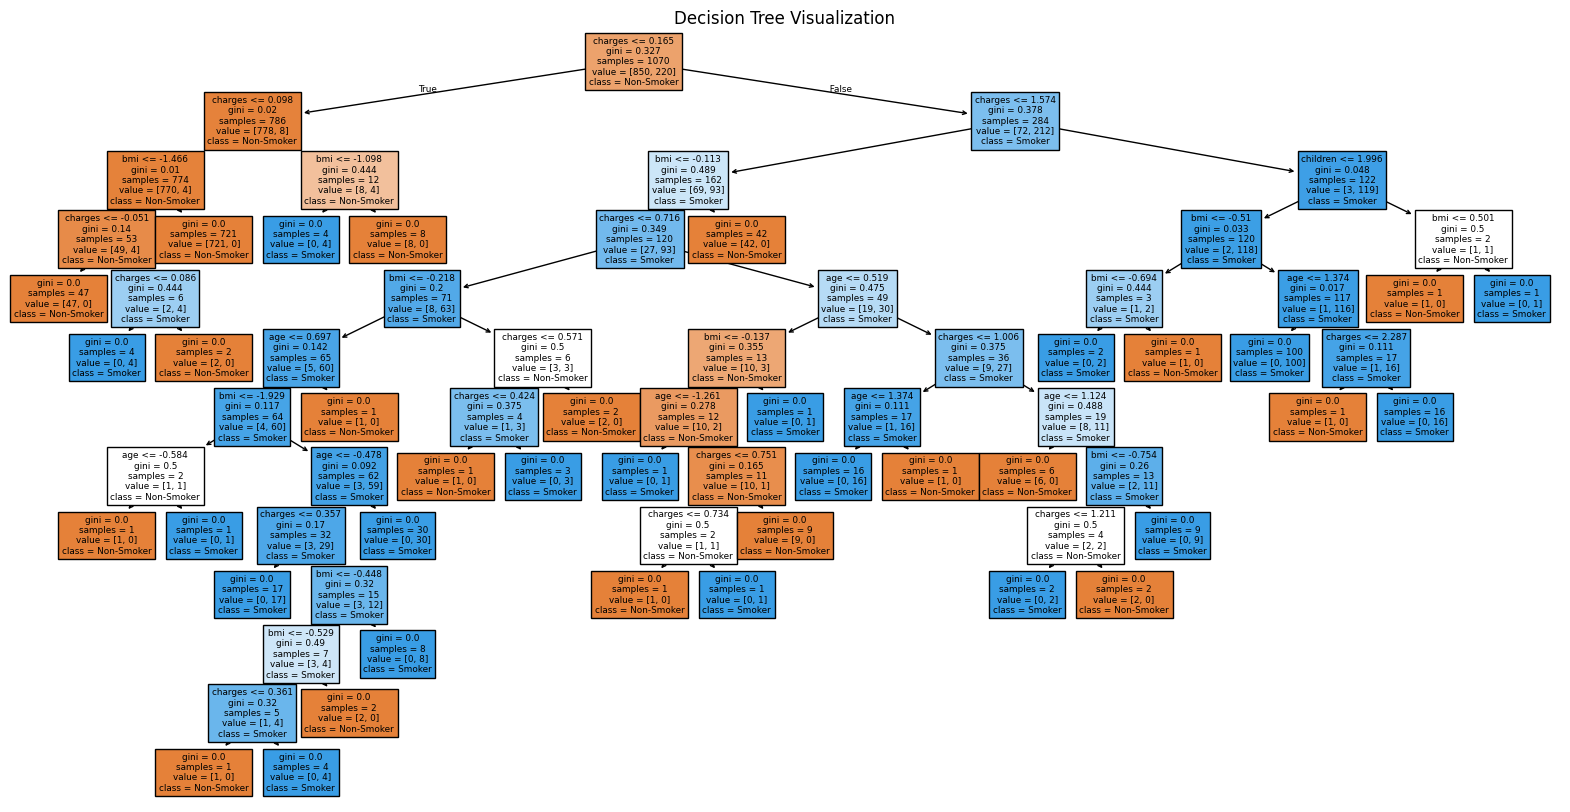

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print results
print("Decision Tree Accuracy:", accuracy_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=data.drop(columns=['smoker']).columns, class_names=['Non-Smoker', 'Smoker'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


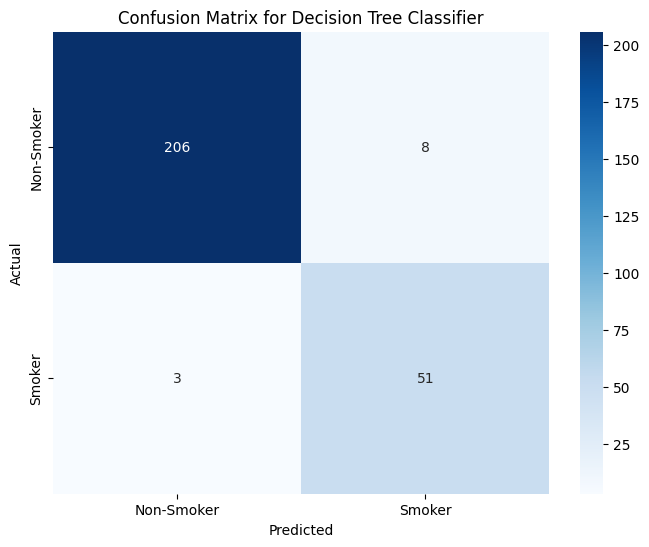

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


Random forest

Random Forest Accuracy: 0.9626865671641791

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       214
           1       0.87      0.96      0.91        54

    accuracy                           0.96       268
   macro avg       0.93      0.96      0.94       268
weighted avg       0.97      0.96      0.96       268



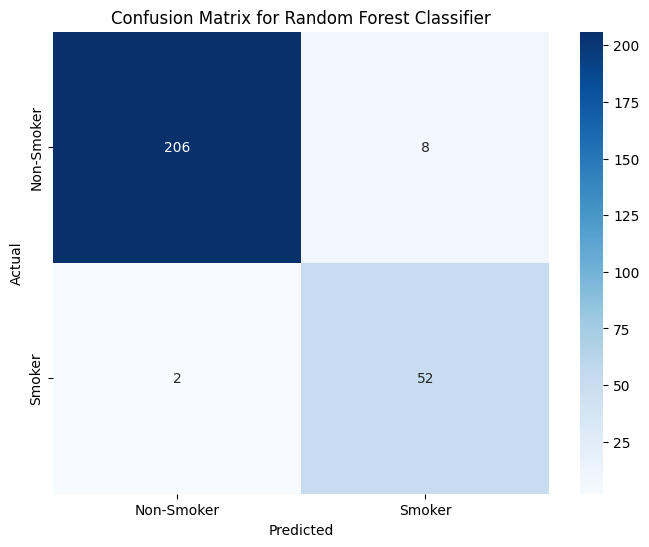

In [ ]:
# Train Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predict for Random Forest
y_pred_rf = random_forest.predict(X_test)

# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification Report for Random Forest (optional)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix for Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)

# Categorize 'charges' into bins (low, medium, high)
data['charges_category'] = pd.cut(
    data['charges'], bins=[-1, 10000, 20000, float('inf')], labels=['low', 'medium', 'high']
)

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

data['sex'] = le_sex.fit_transform(data['sex'])
data['smoker'] = le_smoker.fit_transform(data['smoker'])
data['region'] = le_region.fit_transform(data['region'])

# Features and target variable
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report_output)


Accuracy: 91.42%

Classification Report:
              precision    recall  f1-score   support

        high       0.96      0.85      0.90        55
         low       0.91      0.99      0.95       142
      medium       0.89      0.80      0.84        71

    accuracy                           0.91       268
   macro avg       0.92      0.88      0.90       268
weighted avg       0.91      0.91      0.91       268



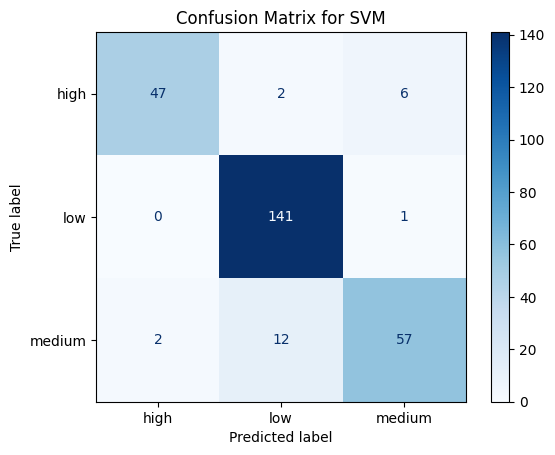

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()
